<a href="https://colab.research.google.com/github/Riddars/BeerProjectForEng/blob/main/Beer_visual(%D0%94%D0%B0%D1%80%D1%8C%D1%8F).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Импорт библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Загрузка предварительно обработанных датасетов
df1 = pd.read_csv('D:\ITMO_Masters_SEMESTER1\Инжиниринг упарвления данными ПИШ\df1.csv')
df2 = pd.read_csv('D:\ITMO_Masters_SEMESTER1\Инжиниринг упарвления данными ПИШ\df2.csv')

In [ ]:
# Основная информация по первому датасету
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69372 entries, 0 to 69371
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BeerID         69372 non-null  int64  
 1   Name           69371 non-null  object 
 2   URL            69372 non-null  object 
 3   Style          69372 non-null  object 
 4   StyleID        69372 non-null  int64  
 5   Size(L)        69372 non-null  float64
 6   OG             69372 non-null  float64
 7   FG             69372 non-null  float64
 8   ABV            69372 non-null  float64
 9   IBU            69372 non-null  float64
 10  Color          69372 non-null  float64
 11  BoilSize       69372 non-null  float64
 12  BoilTime       69372 non-null  int64  
 13  BoilGravity    69372 non-null  float64
 14  Efficiency     69372 non-null  float64
 15  MashThickness  69372 non-null  float64
 16  SugarScale     69372 non-null  int64  
 17  BrewMethod     69372 non-null  int64  
 18  PitchR

In [ ]:
# Основная информация по второму датасету
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5556 entries, 0 to 5555
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         5556 non-null   object 
 1   key          5556 non-null   int64  
 2   Style        5556 non-null   object 
 3   Style Key    5556 non-null   int64  
 4   Brewery      5556 non-null   object 
 5   Description  5556 non-null   object 
 6   ABV          5556 non-null   float64
 7   Ave Rating   5556 non-null   float64
 8   Min IBU      5556 non-null   int64  
 9   Max IBU      5556 non-null   int64  
 10  Astringency  5556 non-null   int64  
 11  Body         5556 non-null   int64  
 12  Alcohol      5556 non-null   int64  
 13  Bitter       5556 non-null   int64  
 14  Sweet        5556 non-null   int64  
 15  Sour         5556 non-null   int64  
 16  Salty        5556 non-null   int64  
 17  Fruits       5556 non-null   int64  
 18  Hoppy        5556 non-null   int64  
 19  Spices

In [ ]:
# Вывод наименований столбцов в отдельной ячейке
# (для личного удобства)
print('Столбцы df1:', '\n', df1.columns, '\n\n\n', 'Столбцы df2:', '\n', df2.columns)

Столбцы df1: 
 Index(['BeerID', 'Name', 'URL', 'Style', 'StyleID', 'Size(L)', 'OG', 'FG',
       'ABV', 'IBU', 'Color', 'BoilSize', 'BoilTime', 'BoilGravity',
       'Efficiency', 'MashThickness', 'SugarScale', 'BrewMethod', 'PitchRate',
       'PrimaryTemp', 'PrimingMethod', 'PrimingAmount', 'UserId'],
      dtype='object') 


 Столбцы df2: 
 Index(['Name', 'key', 'Style', 'Style Key', 'Brewery', 'Description', 'ABV',
       'Ave Rating', 'Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol',
       'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices',
       'Malty'],
      dtype='object')


## **Первый датасет**

| Столбец | Описание |
|---------|----------|
| **BeerID** | Уникальный идентификатор для каждого вида пива. |
| **Name** | Название пива. |
| **URL** | URL-адрес связанной с пивом информации (например, на BeerAdvocate). |
| **Style** | Стиль пива. |
| **StyleID** | Уникальный идентификатор стиля пива |
| **Size(L)** | Объем партии в литрах. |
| **OG (Original Gravity)** | Плотность сусла до начала брожения. |
| **FG (Final Gravity)** | Плотность сусла после завершения брожения. |
| **ABV (Alcohol By Volume)** | Содержание алкоголя по объему. |  
| **IBU (International Bitterness Units)** | Международные единицы горечи. |
| **Color** | Цветность пива. |
| **BoilSize** | Размер партии до кипячения. |
| **BoilTime** | Время кипячения. |
| **BoilGravity** | Плотность сусла перед началом кипячения. |
| **Efficiency** | Эффективность пивоварения.
| **MashThickness** | Плотность сусла в толще посева. |
| **SugarScale** | ... |
| **BrewMethod** | Метод приготовления пива. |
| **PitchRate** | Скорость закваски (количество добавленных дрожжей). |
| **PrimaryTemp** | Температура брожения. |
| **PrimingMethod** | Метод насыщения углекислым газом перед упаковкой. |
| **PrimingAmount** | Количество добавленного углекислого газа перед упаковкой. |
| **UserId** | Идентификатор пользователя, связанного с пивом (если применимо). |

### Распределение количества рецептов для разных стилей пива в датасете *df1*

In [ ]:
# Подсчет количества примеров для каждого класса стиля пива
beer_style_counts = df1['Style'].value_counts()
beer_style_counts

Style
American IPA              11529
American Pale Ale          7471
Saison                     2562
American Light Lager       2118
American Amber Ale         2004
                          ...  
Apple Wine                    4
Metheglin                     3
Traditional Perry             2
Pyment (Grape Melomel)        2
French Cider                  2
Name: count, Length: 175, dtype: int64

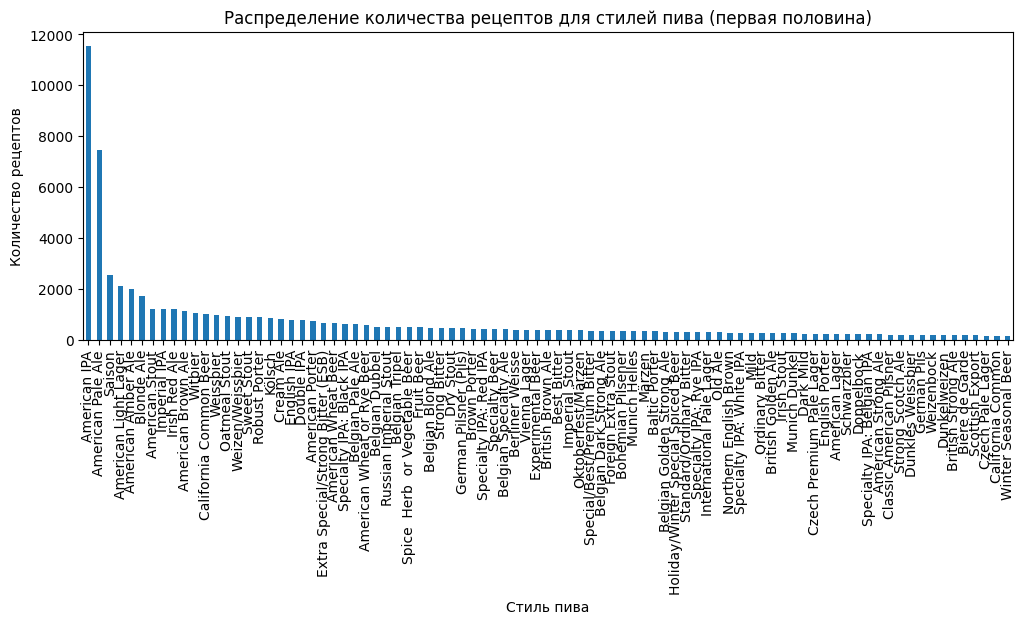

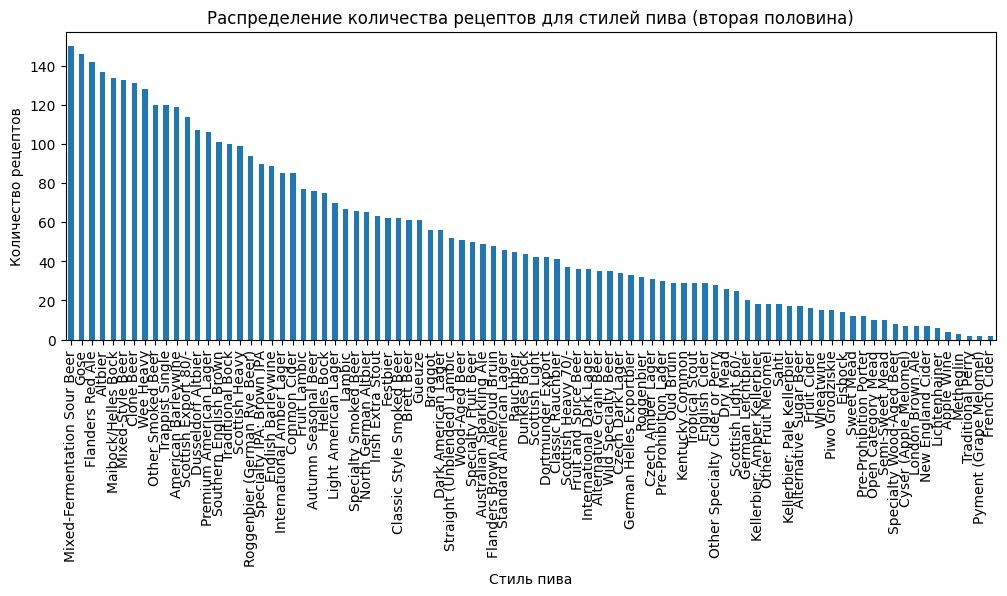

In [ ]:
# Подсчет количества примеров для каждого класса стиля пива
beer_style_counts = df1['Style'].value_counts()

# Разделение стилей на две части
beer_style_counts_sorted = beer_style_counts.sort_values(ascending=False)
first_half_styles = beer_style_counts_sorted[:len(beer_style_counts_sorted)//2]
second_half_styles = beer_style_counts_sorted[len(beer_style_counts_sorted)//2:]

# Создание первого графика
plt.figure(figsize=(12, 4))
first_half_styles.plot(kind='bar')
plt.title('Распределение количества рецептов для стилей пива (первая половина)')
plt.xlabel('Стиль пива')
plt.ylabel('Количество рецептов')
plt.show()

# Создание второго графика
plt.figure(figsize=(12, 4))
second_half_styles.plot(kind='bar')
plt.title('Распределение количества рецептов для стилей пива (вторая половина)')
plt.xlabel('Стиль пива')
plt.ylabel('Количество рецептов')
plt.show()

Как видно из графикаа, распределение количества рецептов по разным стилям неравномерно. Слишком большой разброс по количеству рецептов. Судя по этим подсчетам можно сделать вывод, что данная выборка не является подходящей для анализа данных, визуализации результатов и их интерпретации, а так же для обучения моделей, ведь каждый стиль пива имеет свои характеристики, значит, в датасете значительный перевес по характеристикам, своейственным для стиля *American IPA (11 529 записей - 1/6 часть от всех записей датасета)*.

## **Второй датасет**

| Столбец  | Описание               |
|----------|------------------------|
| **Name** | Название рецепта пива. |
| **key** | Ключевой идентификатор или код для рецепта пива. |
| **Style** | Стиль пива, например, IPA, Stout, Lager и т.д. |
| **Style Key** | Ключевой идентификатор для стиля пива. |
| **Brewery** | Название пивоварни, создавшей рецепт. |
| **Description** | Описание рецепта или характеристики пива. |
| **ABV** | Содержание алкоголя по объему (Alcohol By Volume). |
| **Ave Rating** | Средний рейтинг пива. |
| **Min IBU** | Минимальное значение Международных единиц горечи. |
| **Max IBU** | Максимальное значение Международных единиц горечи. |
| **Astringency** | Показатель вязкости или астрингентности. |
| **Body**| ... |
| **Alcohol** | Значение алкогольности в характере пива. |
| **Bitter** | Степень горечи. |
| **Sweet** | Сладость. |
| **Sour** | Кислотность. |
| **Salty** | Соленость. |
| **Fruits** | Проявление фруктовых нот в пиве. |
| **Hoppy** | Содержание хмеля. |
| **Spices** | Присутствие специй в рецепте. |
| **Malty** | Солод. |


### Распределение количества рецептов для разных стилей пива в датасете *df2*

In [ ]:
# Подсчет количества примеров для каждого класса стиля пива
beer_style_counts = df2['Style'].value_counts()
beer_style_counts

Style
Altbier                           50
Lager - MÃ¤rzen / Oktoberfest     50
Red Ale - Imperial                50
Red Ale - American Amber / Red    50
Quadrupel (Quad)                  50
                                  ..
Sour - Flanders Oud Bruin         49
Sour - Flanders Red Ale           49
Lager - European Pale             49
Sour - Gose                       49
Lambic - Faro                     16
Name: count, Length: 112, dtype: int64

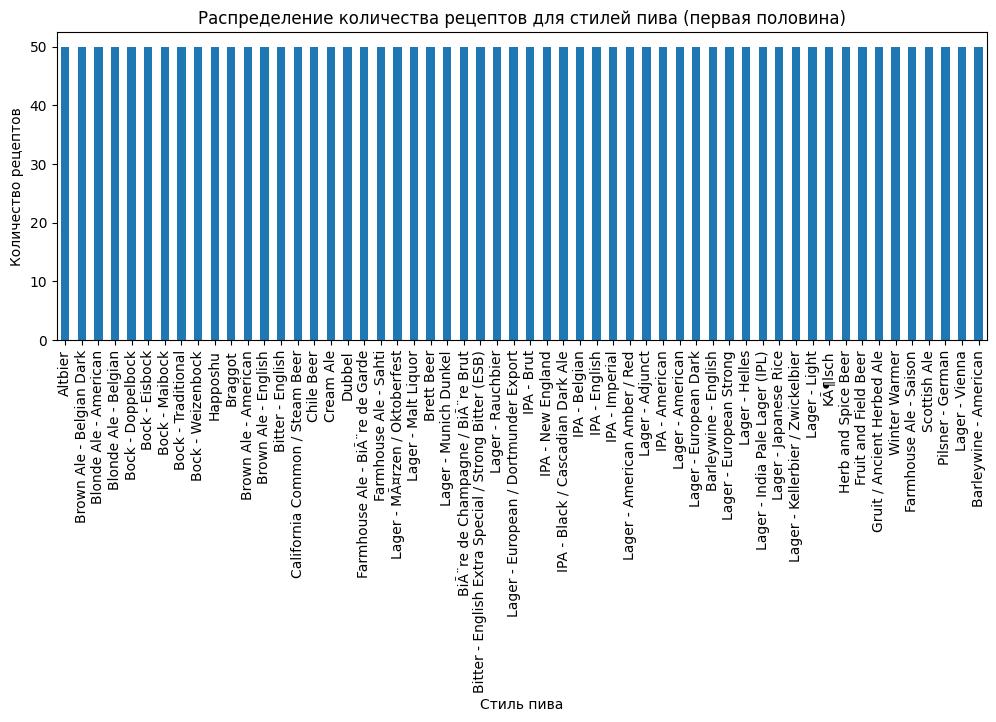

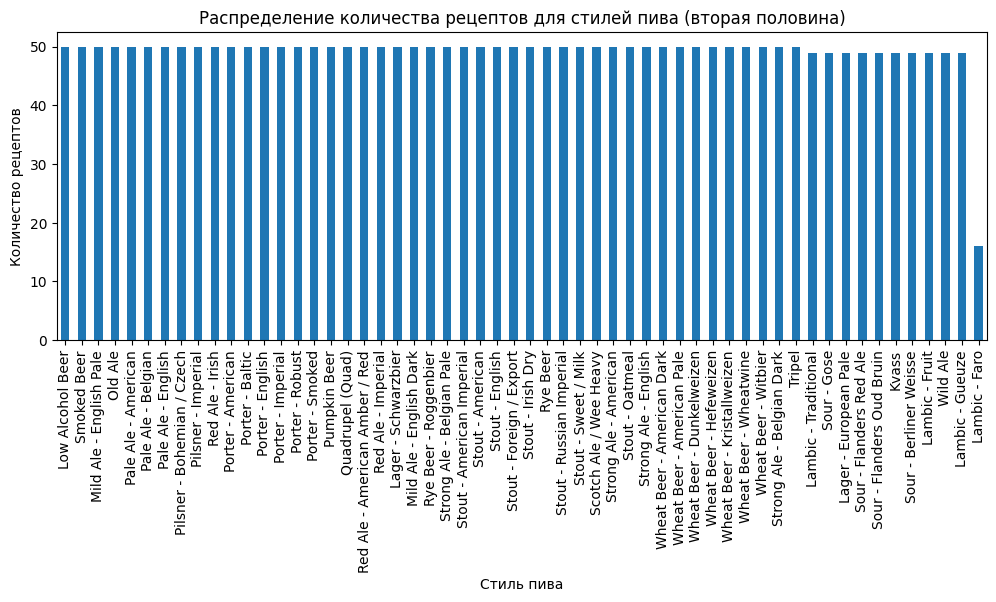

In [ ]:
# Разделение стилей на две части
beer_style_counts_sorted = beer_style_counts.sort_values(ascending=False)
first_half_styles = beer_style_counts_sorted[:len(beer_style_counts_sorted)//2]
second_half_styles = beer_style_counts_sorted[len(beer_style_counts_sorted)//2:]

# Создание первого графика
plt.figure(figsize=(12, 4))

first_half_styles.plot(kind='bar')

plt.title('Распределение количества рецептов для стилей пива (первая половина)')
plt.xlabel('Стиль пива')
plt.ylabel('Количество рецептов')

plt.show()

# Создание второго графика
plt.figure(figsize=(12, 4))

second_half_styles.plot(kind='bar')

plt.title('Распределение количества рецептов для стилей пива (вторая половина)')
plt.xlabel('Стиль пива')
plt.ylabel('Количество рецептов')

plt.show()

В данном датасете распределение записей по стилю является равномерным, за исключением одного стиля - *Lambic - Faro* (16 записей вместо 49-50). Можно не удалять этот рецепт, так как заметного влияния на результаты это не окажет.

### Гистограмма рейтинга *Ave Rating*

C:\Users\Дарья\AppData\Local\Temp\ipykernel_3432\308359846.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df2['Ave Rating'], bins=30, kde=True, palette='viridis')


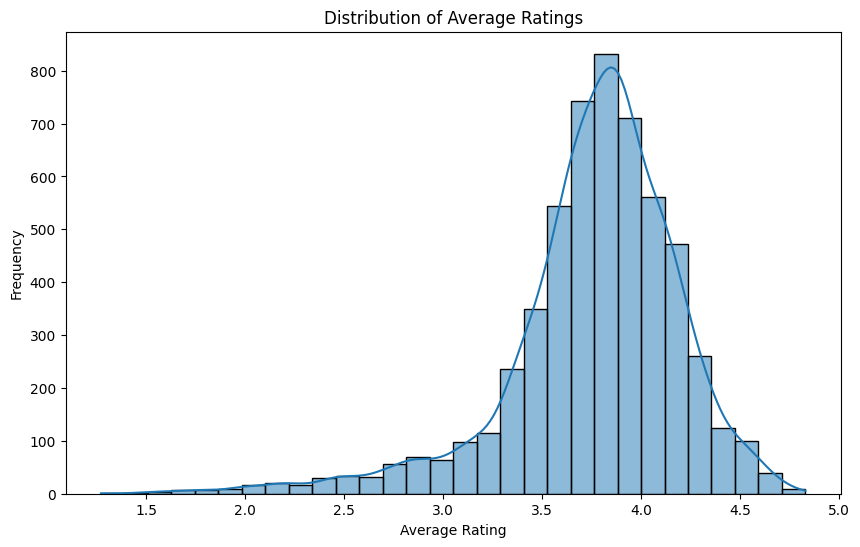

In [ ]:
# Построим гистограмму распределения рейтинга среди всех рецептов пива
plt.figure(figsize=(10, 6))

sns.histplot(df2['Ave Rating'], bins=30, kde=True)

plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')

plt.show()


Рецепты с рейтингом от 3.6 до 4.0 встречаются чаще остальных. Учитывая, что рецептов с рейтингом 5 совсем нет (ведь ничто неидеально), большинство рецептов были оценены пользователями хорошо, а это является положительным качеством для нас.

In [ ]:
# Вывод максимальной оценки рейтинга среди рецептов
beer_style_counts = df2['Ave Rating']
print('Максимальный рейтинг:', max(beer_style_counts))

Максимальный рейтинг: 4.83


### Взаимосвязь вкусовых характеристик и рейтинга

В этом пункте рассмотрим взаимосвязь следующих вкусовых характеристик:
* **Bitter** - Степень горечи.
* **Sweet** - Сладость.
* **Sour** - Кислотность.
* **Salty** - Соленость.
* **Fruits** - Проявление фруктовых нот в пиве.

А также рассмотрим влияение параметра *Spices* на вкусовые характеристики.

ИСпользуем график pairplot для выявления закономерностей между парами характеристик.

График позволяет оценить, есть ли какие-то видимые тренды или корреляции между выбранными параметрами и оценкой (Ave Rating). Если точки распределены вдоль диагонали, это может указывать на линейные отношения между переменными. Особое внимание следует уделять областям, где цвет точек сильно меняется, что может указывать на различные уровни оценок.

d:\tools\stepikMLenv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\tools\stepikMLenv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\tools\stepikMLenv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\tools\stepikMLenv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grou

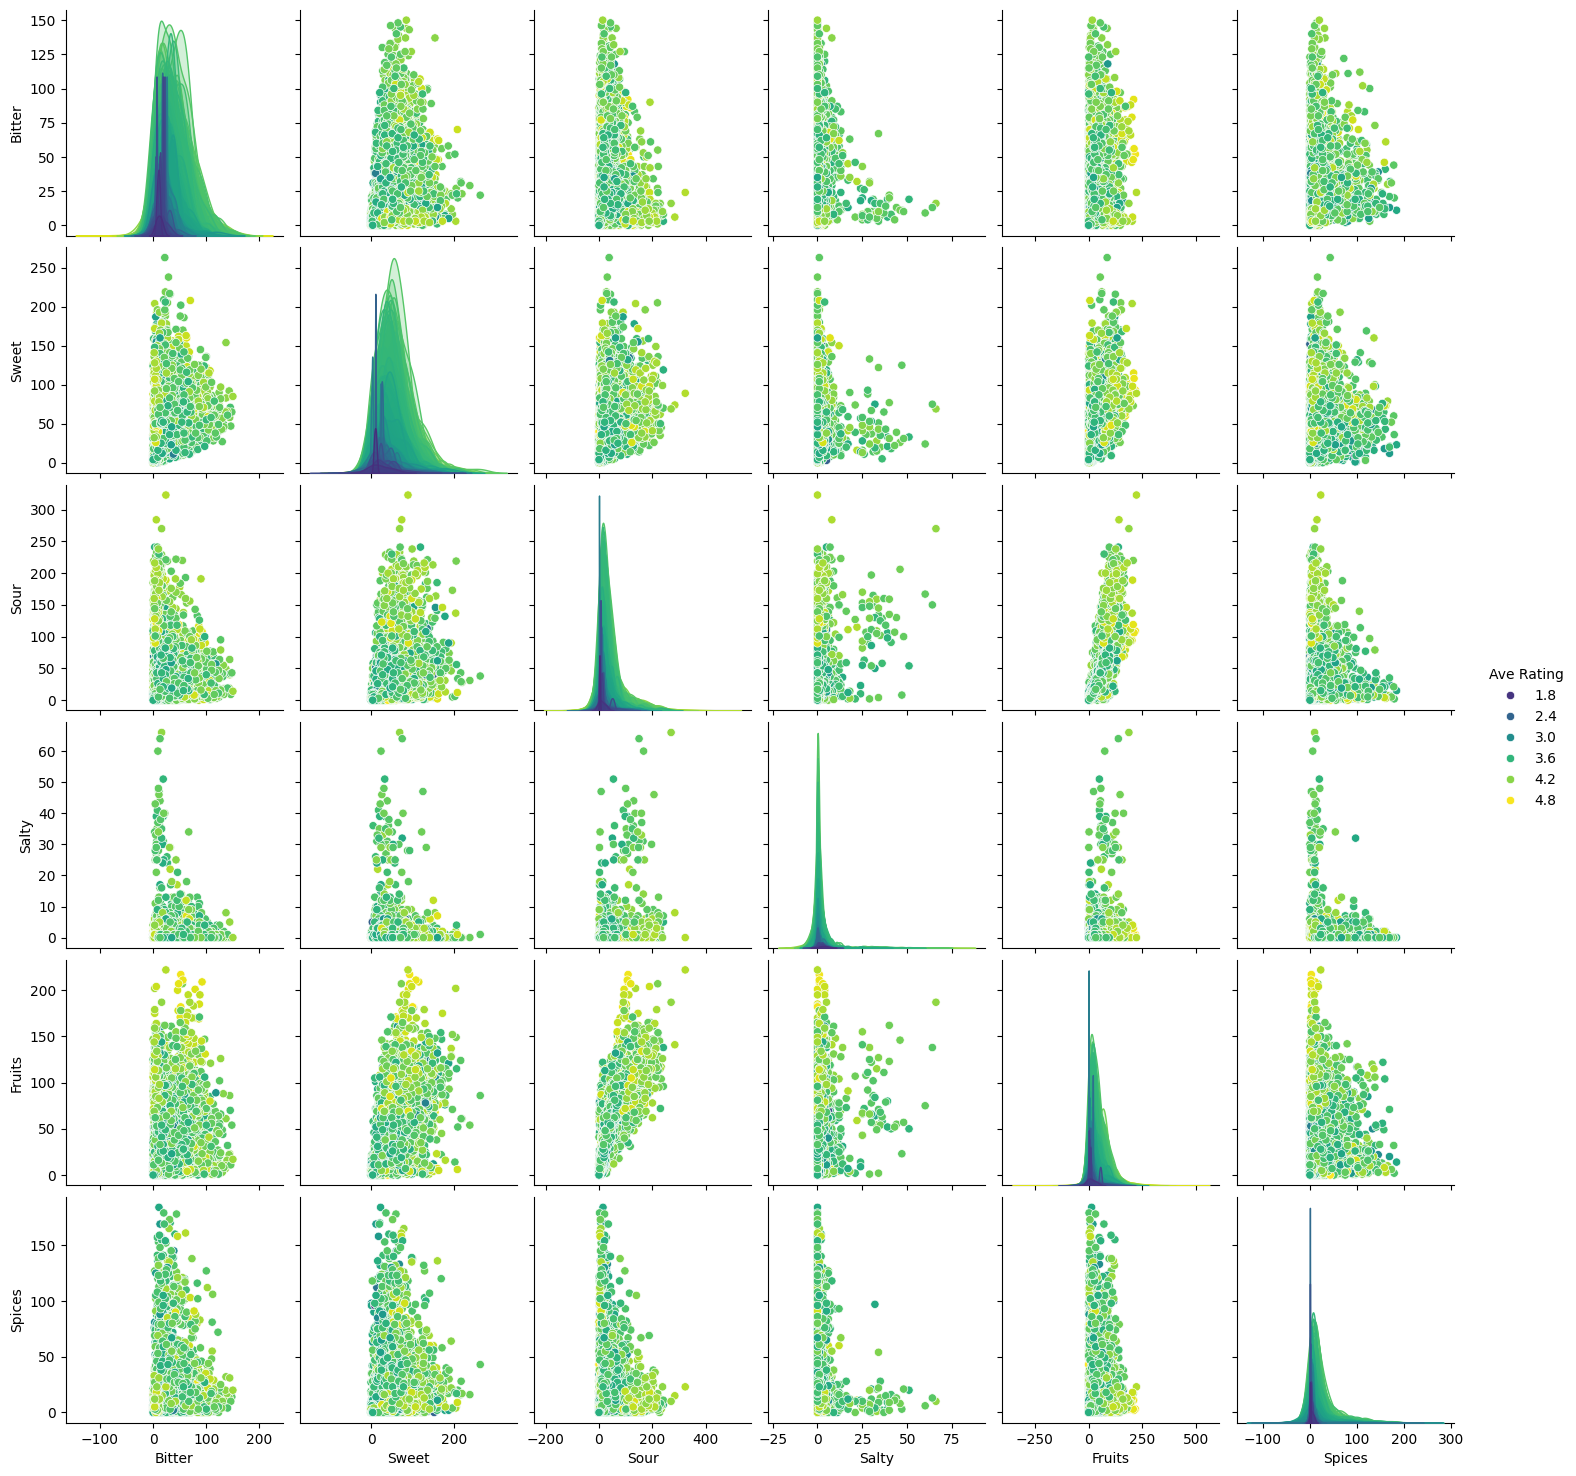

In [ ]:
# Выбор параметров (вкусовые характеристики и рейтинг)
selected_parameters = ['Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Spices', 'Ave Rating']
selected_data = df2[selected_parameters]

# Отображение взаимосвязей
sns.pairplot(selected_data, diag_kind='kde', kind='scatter', hue='Ave Rating', palette='viridis')

plt.show()

**Диагональные гистограммы и ядерные оценки плотности (KDE):**

На главной диагонали расположены гистограммы или KDE для каждой переменной, что позволяет оценить их распределение.

Отсюда можно сделать выводы, что в датасете представлены сорта разной степени *горечи и сладости*, наименее горькие или наименее сладкие рецепты имеют более нихкий рейтинг - менее 3.0.

А вот сильно *соленых* рецептов не так уж и много, что очевидно, ведь пиво в большинстве своем - не соленый напиток.

**Точечные графики вне диагонали:**

Точки на графике *Sour & Fruits* (Ксилотность & Фруктовые нотки) распределены вдоль диагонали по восходящей. Судя по графику, как раз вкус фруктов придает кислинку напитку: чем выше значение Fruits. тем выше Sour. Также заметно различие цвета точек на графике: Слева внизу они более темные, чем справа внизу, это говорит о том, что напитки с более высокими показателями фруктового и кислого вкусов имеют более высокий рейтинг. При чем напитки с выраженным фруктовым вкусом, но маленькой кислинкой, имеют рейтинг ниже.

Низкий показатель *Sour* отрицательно влияет на рейтинг рецепта.

Показатель *Sweet* в паре с другими вкусовыми характеристиками не оказывает сильного влияения на рейтинг.

Показатель *Spices* при низких значениях в паре с другими вкусовыми характеристиками создают хорошее впечатление у потребителей.  

### Взаимосвязь между содержанием алкоголя (ABV) и уровнем горечи (IBU)

ДАнный график Scatter Plot отображает взаимосвязь между содержанием алкоголя по объему (ABV) и максимальной горечью (Max IBU) в пиве.

Подавляющее большинство рецептов имеют значение ABV в диапазоне от 0 до 20, поэтому на отображении графика установлены лимиты.

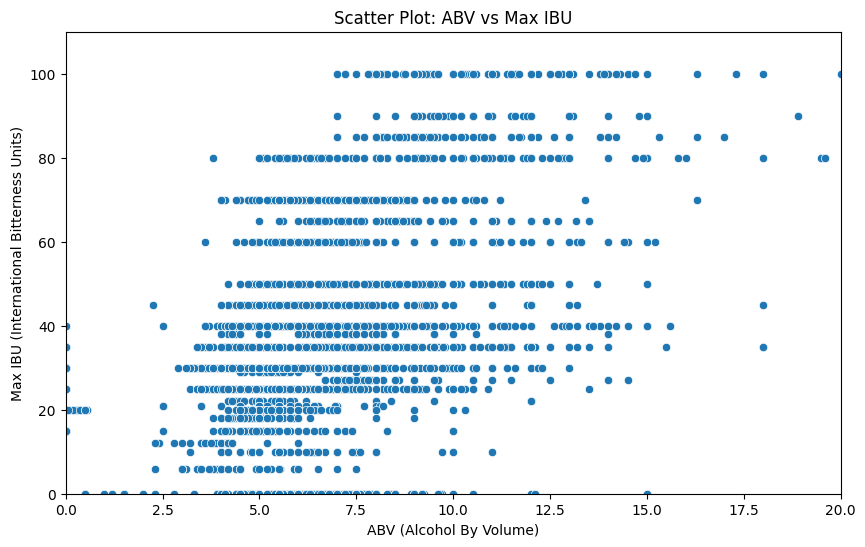

In [ ]:
# Построение графика
plt.figure(figsize=(10, 6))

sns.scatterplot(x='ABV', y='Max IBU', data=df2)

#sns.regplot(x='ABV', y='Max IBU', data=df2, scatter=False, color='red')

plt.title('Scatter Plot: ABV vs Max IBU')
plt.xlabel('ABV (Alcohol By Volume)')
plt.ylabel('Max IBU (International Bitterness Units)')

plt.xlim(0, 20)
plt.ylim(0, 110)

plt.show()


**Тенденция:**

График не показывает явной линейной тенденции между ABV и Max IBU. Однако, с ростом максимального уровня горечи в рецепте в большиснтве случаев ратсет и показатель ABV.


**Разброс данных:**

Данные по обеим осям разбросаны в различных областях графика, что может указывать на разнообразие стилей пива с разными уровнями алкоголя и горечи.


**Кластеры:**

Можно обратить внимание на наличие кластеров, где точки скапливаются в определенных областях графика. Это связано не с самой характеристикой горечи, а с форматом отображения данных в этом столбце - данные имеют целочисленный тип.

### Корреляционная матрица для характеристик ABV, Ave Rating, Max IBU и Min IBU

Построим корреляционую матрицу определения уровня взаимосвязи между следующими характеристиками:

* **ABV** - Содержание алкоголя по объему.
* **Ave Rating** - Средний рейтинг рецепта.
* **Min IBU** - Минимальное  значение горечи в Международных Единицах горечи.
* **Max IBU** - Максимальное значение горечи в Международных Единицах горечи.

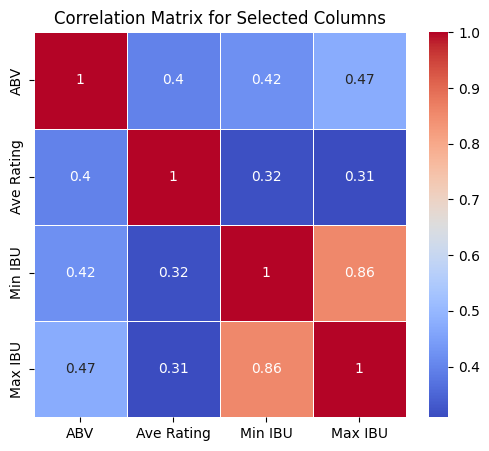

In [ ]:
# Выбор характеристик
selected_columns = ['ABV', 'Ave Rating', 'Min IBU', 'Max IBU']

# Построение матрицы корреляции
plt.figure(figsize=(6, 5))

sns.heatmap(df2[selected_columns].corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Correlation Matrix for Selected Columns')

plt.show()


Слабая и сильная положительная корреляции

* Кажется очевидным, что показатели *Min IBU* и *Max IBU* должны иметь высокий коэффициент коррелляции. Однако , это не так, высокий коэффициент корреляции в данном случае может указывать на стабильность уровня горечи в пиве.  

* Показатели *ABV* и *Ave Rating* имеют умеренную положительную корреляцию: коэффициент равен 0.4. Это может указывать на следующую тенденцию: люди склонны оценивать немного выше более крепкие сорта пива.

* Коэффициенты корреляции 0.42 для *Min IBU* и 0.47 для *Max IBU* с *Ave Rating* указывают на умеренную положительную корреляцию между уровнем горечи и средней оценкой пива. Это может означать, что пиво с более высоким уровнем горечи (измеряемым как International Bitterness Units, IBU) имеет тенденцию получать более высокие средние оценки от потребителей.

Однако, корреляция не подразумевает причинно-следственной связи.

### Солод и хмель

#### Взаимосвязь уровня солода, хмеля и рейтинга

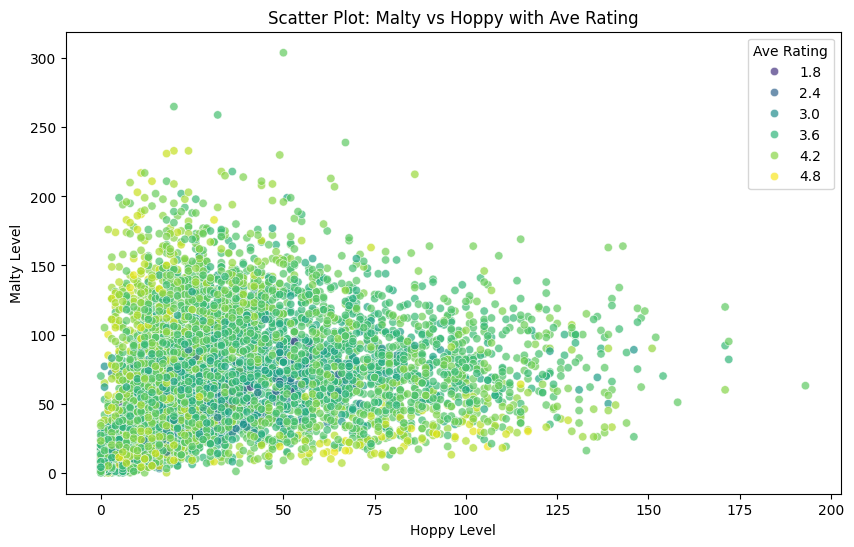

In [ ]:

# Выберите необходимые параметры для анализа
selected_parameters = ['Malty', 'Hoppy', 'Ave Rating']

# Создайте подмножество данных с выбранными параметрами
selected_data = df2[selected_parameters]

# Используйте scatter plot с цветом точек, представляющим среднюю оценку пива
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='Hoppy', y='Malty', data=selected_data, hue='Ave Rating', palette='viridis', alpha=0.7)

# Добавьте легенду
scatter.legend(title='Ave Rating')

plt.title('Scatter Plot: Malty vs Hoppy with Ave Rating')
plt.xlabel('Hoppy Level')
plt.ylabel('Malty Level')
plt.show()

**Пиво с балансом между солодом и хмелем:**

На графике видно, что пиво с умеренным содержанием и солода, и хмеля (в середине диапазона) имеет более низкие средние оценки. Возможно, это связано с тем, что такое пиво может не иметь ярко выраженных характеристик солода или хмеля, что делает его менее интересным для некоторых ценителей.

**Высокий хмель, низкий солод и наивысшие оценки:**

Пиво с высоким содержанием хмеля и низким солодом имеет наивысшие средние оценки. Это может быть связано с предпочтением определенной группы потребителей к более горькому и ароматному пиву, особенно в контексте современных вкусовых трендов.

**Высокий солод, низкий хмель и наивысшие оценки:**

Пиво с высоким содержанием солода и низким хмелем также показывает высокие средние оценки. Это может быть интересным для тех, кто предпочитает более насыщенные вкусовые характеристики солода.

#### Связь показателей солода, хмеля, вязкости, рейтинга

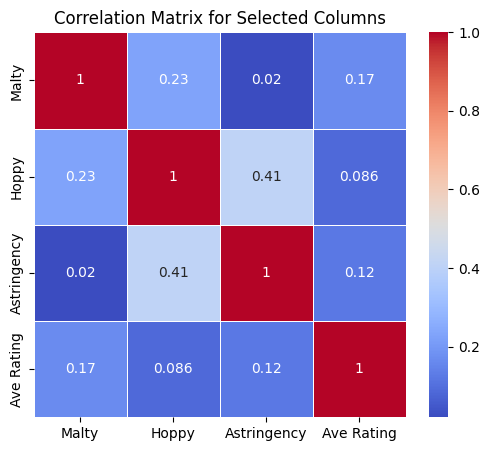

In [ ]:
# Выбор характеристик
selected_columns = ['Malty', 'Hoppy', 'Astringency', 'Ave Rating']

# Построение матрицы корреляции
plt.figure(figsize=(6, 5))

sns.heatmap(df2[selected_columns].corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Correlation Matrix for Selected Columns')

plt.show()

*Astringency* в означает вяжущий вкус, который может напоминать сухость, стянутость или вяжущее ощущение во рту. Главным источником астригентности в пиве являются танины, которые могут быть извлечены из солода, хмеля и других ингредиентов во время варки. Танины - это полифенольные соединения, которые могут придавать винам, чаям и некоторым пивам астригентные свойства.

В процессе варки солода и хмеля могут высвобождаться танины, особенно если температура варки слишком высока или если вода имеет высокий уровень pH. Неправильные параметры варки могут привести к избыточному извлечению танинов и, следовательно, к усилению астригентности в пиве.

Коэффициент корреляции равный 0.42 может указывать на умеренную положительную линейную взаимосвязь между переменными *Hoppy* и *Astringency*. Это означает, что с увеличением уровня хмеля (Hoppy) вероятно также увеличивается уровень астригентности (Astringency).

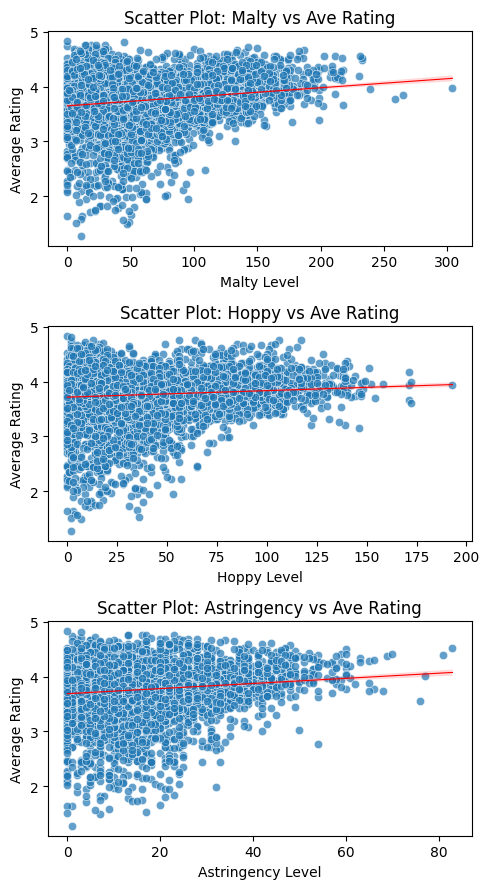

In [ ]:

# Выбор параметров для анализа
selected_parameters = ['Malty', 'Hoppy', 'Astringency', 'Ave Rating']
selected_data = df2[selected_parameters]

# 3x1 сетка для графиков
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5, 9))

# Цикл для создания графиков и помещения их в соответствующие ячейки сетки
for i, parameter in enumerate(['Malty', 'Hoppy', 'Astringency']):

    sns.scatterplot(x=parameter, y='Ave Rating', data=selected_data, alpha=0.7, ax=axes[i])

    sns.regplot(x=parameter, y='Ave Rating', data=df2, scatter=False, color='red', line_kws={'linewidth': 0.8}, ax=axes[i])

    axes[i].set_title(f'Scatter Plot: {parameter} vs Ave Rating')
    axes[i].set_xlabel(f'{parameter} Level')
    axes[i].set_ylabel('Average Rating')

# Регулировка расстояния между графиками
plt.tight_layout()
plt.show()


Эти графики лишь подтверждают низкие коэффициенты корреляции - близкие к нулю. Сперва может показаться, что у рецептов пива с показателями *Astrigency*, *Hoppy*, *Malty* чаще встречаются рецепты с низким показателем рейтинга - менее 3.0. Однако это связано скорее не с количсетвом хмеля, солода или уровнем вязкости, а с самими данными: рецептов со значениями меньше половины диапазона по параметрам *Astrigency*, *Hoppy*, *Malty* банально больше в датасете, от того разброс значений рейтинга выше.

### Визуализация разброса значений для различных вкусовых характеристик

Ящик с усами представляет собой визуализацию статистических характеристик набора данных.

С помощью данного гграфика будут провизуализированы следующие характеристики:
* **Astringency** - вязкость.
* **Bitter** - горечь.
* **Sweet** - сладость.
* **Sour** - кислый вкус.
* **Salty** - соленый вкус.
* **Fruits** - фруктовые нотки.
* **Spices** - содержание специй.


d:\tools\stepikMLenv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\tools\stepikMLenv\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
d:\tools\stepikMLenv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\tools\stepikMLenv\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future versio

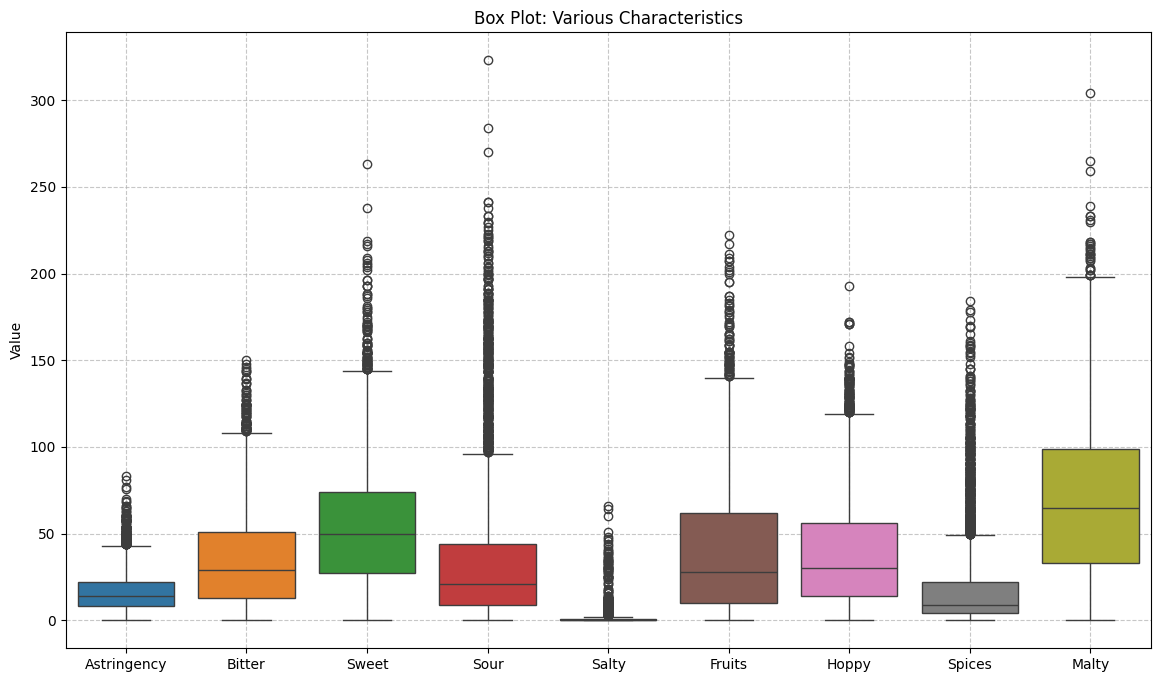

In [ ]:
# Построение графика
plt.figure(figsize=(14, 8))

sns.boxplot(data=df2[['Astringency', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty']])

plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Box Plot: Various Characteristics')
plt.ylabel('Value')

plt.show()


Характеристики *Bitter*, *Sour*, *Fruits* в большей части рецетов имеют едва заметный перевес в сторону значений с более высокими показателями.